For solving path dependencies

In [1]:
import sys
import os

current_dir = %pwd

# Detect the parent directory dynamically
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

{'binary_accuracy': 0.7731884057971015, 'mean_squared_error': 0.16088390183727486}
{'binary_accuracy': 0.8568840579710144, 'mean_squared_error': 0.13495027985434155}
{'binary_accuracy': 0.48695652173913045, 'binary_cross_entropy': 2.0745068128667445}
{'binary_accuracy': 0.48695652173913045, 'binary_cross_entropy': 1.1181968343461357}
{'binary_accuracy': 0.48695652173913045, 'binary_cross_entropy': 1.4936531151858499}
{'binary_accuracy': 0.48695652173913045, 'binary_cross_entropy': 1.704608350735788}
{'binary_accuracy': 0.6460144927536232, 'mean_squared_error': 0.19033845440907887}
{'binary_accuracy': 0.48695652173913045, 'mean_squared_error': 0.25243610172531994}
{'binary_accuracy': 0.8416666666666668, 'mean_squared_error': 0.10096092404137733}
{'binary_accuracy': 0.9329710144927535, 'mean_squared_error': 0.06769498811516036}
Epoch 1/500 - {'binary_accuracy': 0.5126050420168067, 'mean_squared_error': 0.4821203103857888}
Epoch 51/500 - {'binary_accuracy': 0.9327731092436975, 'mean_squar

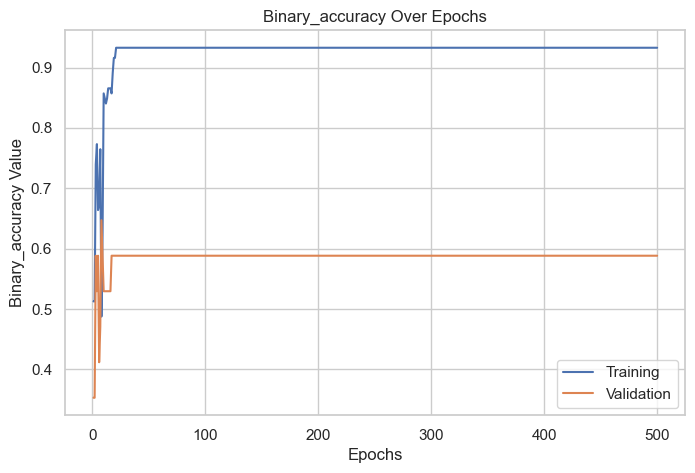

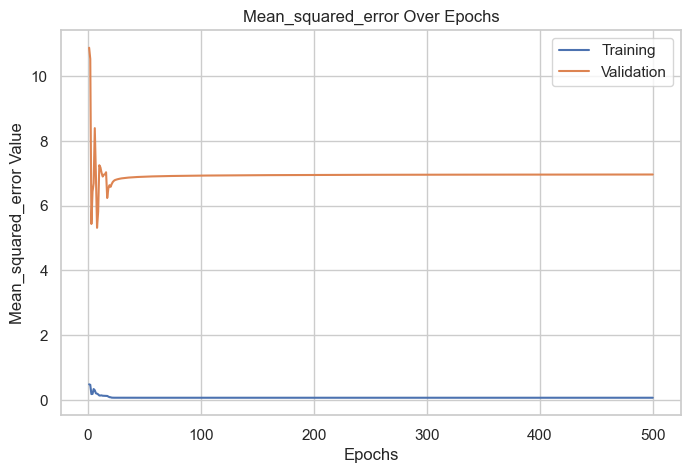

------ Train scores: ------ 
binary_accuracy 	 0.9327850877192981 +\- 0.010648504996674617
mean_squared_error 	 0.06722860258654415 +\- 0.010634932607731252
------ Validation scores: ------ 
binary_accuracy 	 0.9329710144927535 +\- 0.042284331770710615
mean_squared_error 	 0.06769498811516036 +\- 0.04320450536067315
------ Test scores: ------ 
binary_accuracy 	 1.0 +\- [0]
mean_squared_error 	 1.6026847701470246e-05 +\- [0]


In [2]:
from src.main.evaluation.holdout_CV import holdout_CV
from src.main.evaluation.grid_search import RandomGridSearch
from src.main.utils import load_hparams
from src.main.dataset_handler import get_monk


def print_score(mean, std):
    for key in mean.keys():
        print(key, "\t", mean[key], "+\-", std[key])


x_train, y_train, x_test, y_test = get_monk(1)

hyperparameters = load_hparams("monk1")
grid_search = RandomGridSearch(hyperparameters)
train_mean, train_std, val_mean, val_std, test_mean, test_std, model = (
    holdout_CV(x_train, y_train, grid_search, 5, verbose=False)
)

"""for i,model in enumerate(models): 
    print("------ Modello ",i+1," ------")
    print(model.summary())"""


print("------ Train scores: ------ ")
print_score(train_mean, train_std)
print("------ Validation scores: ------ ")
print_score(val_mean, val_std)
print("------ Test scores: ------ ")
print_score(test_mean, test_std)


In [3]:
from src.main.utils import compute_metrics, log_experiment, setup_experiment

log_experiment(setup_experiment("ex1"),model, train_mean, train_std, val_mean, val_std, test_mean, test_std)

TypeError: type list doesn't define __round__ method